# Purity


#### Date: 2019-2-25


I am confused about the purity calculation. The purity should be in the range [0,1] and it should increase when the differences between two distributions increase. However, the results get in the code are different from our expectation. 


### Confusion point 1: $\pi_1,\pi_2$

When I look it back, I feel confused again. Why we have to time $\pi$ in the euqation? The purity function is defined as 

$$\frac{(f_1(x) - f_2(x))^2}{(f_1(x) + f_2(x))^2}$$ 
The $\pi$ in the numerator and denominator are canceled. Then where the $\pi$ comes from? The density function?

Should the density be

$$f_1(x) + f_2(x)$$

or 

$$\pi_1 f_1(x) + \pi_1 f_2(x)$$

### Confusion point 2: why the purity is decreasing when the two functions get more separated  

In [38]:
beta_pbo 
beta_drg 

(Intercept),23.0682623
t1,-4.2604765
I(t1^2),0.5013979


(Intercept),23.6891978
t1,-4.2926488
I(t1^2),0.3689679


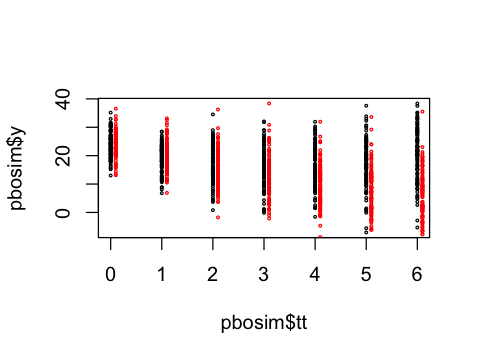

In [39]:
options(repr.plot.width=4, repr.plot.height=3)
plot(pbosim$tt, pbosim$y, col = 1, cex = 0.3)
points(drgsim$tt+0.1, drgsim$y, col = 2, cex = 0.3)

In [40]:
mean(puritys)

[1] 1.513249

### One dimension

I think maybe we can firstly try some one dimension function to check whether the formula is correct or not. 

In one dimension, calculate the purity as: 

$$purity = \int_{-\infty}^{\infty} \frac{(f_1(x)-f_2(x))^2}{f_1(x) + f_2(x)} dx$$

The max value should be 1. But it is actually not in the following computations

#### step 1

first construct normal distribution pdf $f_1(x)$ and $f_2(x)$

In [31]:
f1 = function(x){
  f1 = 1/(sqrt(2*pi) * sigma1) * exp(-1/2 * (x - mu1)^2/sigma1^2)
  return(f1)
}

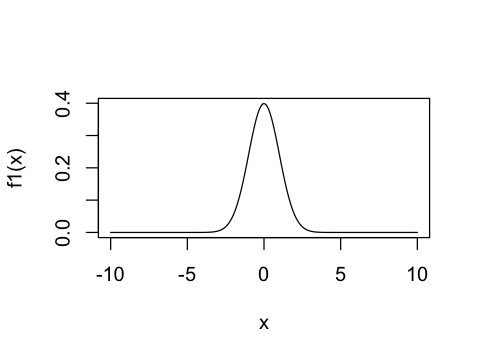

In [34]:
# have a check. The pdf is correct
options(repr.plot.width=4, repr.plot.height=3)
sigma1 = 1; mu1 = 0
x = seq(-10,10,0.1)
plot(x, f1(x), cex = 0.1, type ='l')

In [23]:
# function that follows the above formula
pdf = function(x){
  f1 = 1/(sqrt(2*pi) * sigma1) * exp(-1/2 * (x - mu1)^2/sigma1^2)
  f2 = 1/(sqrt(2*pi) * sigma2) * exp(-1/2 * (x - mu2)^2/sigma2^2)
  if((f1 + f2)!=0){
    res = (f1 - f2)^2/((f1 + f2))
  }else{
    res = 0
  }
  return(res)
}

#### step 2

check purity values with different mean and sigma

1. if we need to times $\pi$, then when the two distributions are really far away, the purity should exceed 1. But the result is opposite

In [26]:
mu1 = 100; sigma1 = 1
mu2 = 0; sigma2 = 1
integrate(Vectorize(pdf),-Inf,Inf)

1 with absolute error < 9.4e-05

2. why when they get closer, the purity get larger? 

In [27]:
mu1 = 10; sigma1 = 1
mu2 = 0; sigma2 = 1
integrate(Vectorize(pdf),-Inf,Inf)

1.999998 with absolute error < 0.00017

In [25]:
mu1 = 10; sigma1 = 10
mu2 = 0; sigma2 = 10
integrate(Vectorize(pdf),-Inf,Inf)

0.4081085 with absolute error < 1.3e-08

In [12]:
mu1 = 10; sigma1 = 0.1
mu2 = 0; sigma2 = 0.2
integrate(Vectorize(pdf),-Inf,Inf)

1 with absolute error < 1e-06

In [14]:
mu1 = 10; sigma1 = 0.001
mu2 = 0; sigma2 = 0.001
integrate(Vectorize(pdf),-Inf,Inf)

1 with absolute error < 2.1e-06

In [29]:
mu1 = 0; sigma1 = 1
mu2 = 1; sigma2 = 1
integrate(Vectorize(pdf),-Inf,Inf)

0.4081085 with absolute error < 7.5e-05

In [9]:
mu1 = 0; sigma1 = 10
mu2 = 0; sigma2 = 2
integrate(Vectorize(pdf),-Inf,Inf)

0.9780256 with absolute error < 4e-06

The results are different from our expectation. 

Besides, from the formula:


$$\begin{aligned}
purity &= \int_{-\infty}^{\infty} \frac{(f_1(x)-f_2(x))^2}{f_1(x) + f_2(x)} dx\\
  & = \int_{-\infty}^{\infty} \frac{(f_1(x)+f_2(x))^2 - 4f_1(x)f_2(x)}{f_1(x) + f_2(x)} dx \\
  & = \int_{-\infty}^{\infty} f_1(x)+f_2(x) - \frac{4f_1(x)f_2(x)}{f_1(x)+f_2(x)} dx \\
  & = \int_{-\infty}^{\infty} [f_1(x)+f_2(x)] dx - \int_{-\infty}^{\infty} \frac{4f_1(x)f_2(x)}{f_1(x)+f_2(x)} dx
  \end{aligned}$$

If $f_1(x) \sim N(\mu_1,\sigma_1)$ , $f_2(x) \sim N(\mu_2,\sigma_2)$ and $f_1(x)$ and $f_2(x)$ are independent. $f_1(x)+f_2(x) \sim N(\mu_1 + \mu_2, \sigma_1 + \sigma_2)$. Therefore,

$$\int_{-\infty}^{\infty} [f_1(x)+f_2(x)] dx = 1$$

And since $f_1(x), f_1(x) > 0$, $\int_{-\infty}^{\infty} \frac{4f_1(x)f_2(x)}{f_1(x)+f_2(x)} dx$ should smaller than 1. Therefore, the purity should smaller or equal to 1, even there is not $\pi_1$ and $\pi_2$ in it. 

**However, when I calculated it, there are values bigger than 1.**

Besides, 

$$\int_{-\infty}^{\infty} \frac{4f_1(x)f_2(x)}{f_1(x)+f_2(x)} dx$$

seems to be divergent. 

To make it easy, we can first assume that

* $\sigma_1 = \sigma_2 = \sigma = 1$.

* $\mu_1 - \mu_2 = 1$

Then

$$\begin{aligned} 
\int_{-\infty}^{\infty} \frac{4f_1(x)f_2(x)}{f_1(x)+f_2(x)} dx &=  4 \int_{-\infty}^{\infty} \frac{\frac{f_2(x)}{f_1(x)}}{1 + \frac{f_2(x)}{f_1(x)}} dx\\
& = 4 \int_{-\infty}^{\infty} \frac{exp(-\frac{1}{2 \sigma} [(x-\mu_2)^2 -(x-\mu_1)^2])}{1 + exp(-\frac{1}{2 \sigma} [(x-\mu_2)^2 -(x-\mu_1)^2])} dx \\
& = 4 \int_{-\infty}^{\infty} \frac{exp(-\frac{1}{2 \sigma} [2x - (\mu_1 + \mu_2)](\mu_1 - \mu_2))}{1+exp(-\frac{1}{2 \sigma} [2x - (\mu_1 + \mu_2)](\mu_1 - \mu_2))} dx \\
& = 4 \int_{-\infty}^{\infty} \frac{exp(-\frac{1}{2 \sigma} [2x - (\mu_1 + \mu_2)])}{1+exp(-\frac{1}{2 \sigma} [2x - (\mu_1 + \mu_2)])} dx \\
& = 4 \int_{-\infty}^{\infty} \frac{kexp(-x)}{1 + kexp(-x)}dx
\end{aligned}
$$
where $k = exp((\mu_1 + \mu_2)/2)$

For $\int_{-\infty}^{\infty} \frac{kexp(-x)}{1 + kexp(-x)}dx$, let $t = 1 + kexp(-x)$. Then

$$dt = -k exp(-x) dx$$

$$\begin{aligned} 
\int_{-\infty}^{\infty} \frac{kexp(-x)}{1 + kexp(-x)}dx &= \int_{-\infty}^{\infty} -\frac{1}{t} dt\\
& = ln(t)|_{-\infty}^{\infty}
\end{aligned}$$

It is divergent!

**Where is the error here in the calculation?**

In [37]:
# read in data
library(lme4)
library(cubature)
setwd('/Users/yaolanqiu/Desktop/NYU/rotation/Rotation2/Week3/from dr.tarpey')
load('puritys190222.RData')

source("cvxcluster-0513.R")
dat = read.table("hcaf.dat", header=T)
dim(dat) # 3364 7

# generate X
tt = as.matrix(0:6) # pt = the order of time points
ni = length(tt) # 7
X = cbind(matrix(1, length(tt), 1), tt, tt^2)

# simulate data set 
pbo = dat[dat$trt == 0, ] # placebo group
drg = dat[dat$trt == 1, ] # drug group

set.seed(123)
# get the parameter: beta and D
fit_pbo <- lmer(y ~ t1 + I(t1^2) + (t1+I(t1^2)|subj),              
                data = pbo, REML = FALSE)
fit_drg <- lmer(y ~ t1 + I(t1^2) + (t1+I(t1^2)|subj),              
                data = drg, REML = FALSE)

# random effect
sigma.drg <- attr(VarCorr(fit_drg), "sc") 
sigma.pbo <- attr(VarCorr(fit_pbo), "sc") 

# beta
beta_pbo = as.matrix(fixef(fit_pbo)[1:3])
beta_drg = as.matrix(fixef(fit_drg)[1:3])

# generate gamma randomly
Gamma_drg=matrix(c(0,-.5,-.1),3,1)
Gamma_pbo=matrix(c(0,.25,.1),3,1)

# the random effct
Dpbo = VarCorr(fit_pbo)$subj[1:3,1:3]
Ddrg=VarCorr(fit_drg)$subj
epbo=eigen(Dpbo)
edrg=eigen(Ddrg)

# generate 1000 subjects in each group
ndrg=100
npbo=100

#Simulate data

# generate baseline covariates
mux = 1
sigmax=1
xdrg=rnorm(ndrg, mean=mux, sd=sigmax) # baseline covariates
xpbo=rnorm(npbo, mean=mux, sd=sigmax)

# combine dataset
datsim=NULL
for (i in 1:ndrg){
  bi <- edrg$vectors%*%sqrt(abs(diag(edrg$values)))%*%as.matrix(rnorm(3))
  bi = bi 
  yi <- X%*%(beta_drg+bi+Gamma_drg*xdrg[i]) + sigma.drg*rnorm(ni) 
  dati <- NULL
  dati$subj <- paste("drg",rep(i,ni), sep="")
  dati$y <- yi
  dati$tt<- tt
  dati$x <- rep(xdrg[i],ni)
  dati$trt <- rep("drg",ni)
  dati <- data.frame(dati)
  datsim <- rbind(datsim, dati)
}
for (i in 1:npbo){
  bi <- epbo$vectors%*%sqrt(abs(diag(epbo$values)))%*%as.matrix(rnorm(3)) # abs? since there are some eigen values small than 0
  bi = bi
  yi <- X%*%(beta_pbo+bi+Gamma_pbo*xpbo[i]) + sigma.pbo*rnorm(ni)
  dati <- NULL
  dati$subj <- paste("pbo",rep(i,ni), sep="")
  dati$y <- yi
  dati$tt<- tt
  dati$x <- rep(xpbo[i],ni)
  dati$trt <- rep("pbo",ni)
  dati <- data.frame(dati)
  datsim <- rbind(datsim, dati)
}

head(datsim)

# estimate the simulated dataset
pbosim = datsim[datsim$trt == 'pbo', ]
drgsim = datsim[datsim$trt == 'drg', ]
fitdrg.sim = lmer(y ~ tt + I(tt^2) +x + x * tt +
                    x * I(tt^2) + (tt+I(tt^2)|subj),
                  data = drgsim, REML = FALSE)
fitpbo.sim =  lmer(y ~ tt + I(tt^2) + x + x * tt +
                     x * I(tt^2) + (tt+I(tt^2)|subj),
                   data = pbosim, REML = FALSE)

pw = function(w){
  # estimated beta, gamma, sigma parameter
  beta_drg_est = as.matrix(fixef(fitdrg.sim))[2:3]
  gamma_drg_est = as.matrix(fixef(fitdrg.sim))[5:6]
  D_drg_est = as.matrix(VarCorr(fitdrg.sim)$subj)[2:3, 2:3]
  
  beta_pbo_est = as.matrix(fixef(fitpbo.sim))[2:3]
  gamma_pbo_est = as.matrix(fixef(fitpbo.sim))[5:6]
  D_pbo_est = as.matrix(VarCorr(fitpbo.sim)$subj)[2:3, 2:3]
  
  # integrate on zi 
  PDF_fzw = function(X) {
    
    mu_drg = beta_drg_est + gamma_drg_est * w 
    mu_pbo = beta_pbo_est + gamma_pbo_est * w 
    
    Q_drg = (-1/2)*t(X-mu_drg)%*%solve(D_drg_est)%*%(X-mu_drg)
    Q_pbo = (-1/2)*t(X-mu_pbo)%*%solve(D_pbo_est)%*%(X-mu_pbo)
    
    # pdf of multivariable normal distribution 
    f_drg = (1/(2*pi))*(1/sqrt(det(D_drg_est)))*exp(Q_drg)
    f_pbo = (1/(2*pi))*(1/sqrt(det(D_pbo_est)))*exp(Q_pbo)
    
    # purity function
    if((f_drg + f_pbo)!=0){
      res = (f_pbo - f_drg)^2 / (f_drg + f_pbo)
    }else{
      res = 0
    }
    return(res)
  }
  return( adaptIntegrate(PDF_fzw, 
                         lowerLimit= c(-Inf,-Inf),  
                         upperLimit=c(Inf,Inf))$integral)
}

# calculate purity on each w, get the mean value
datsim_unique = unique(data.frame(subj = datsim$subj, trt = datsim$trt, w = datsim$x))
head(datsim_unique)

puritys = c()
for(i in 1:dim(datsim_unique)[1]){
  w = datsim_unique$w[i]
  puritys = c(puritys, pw(w))
}

[1] 3364    7

singular fit


subj,y,tt,x,trt
drg1,32.83825,0,0.4395244,drg
drg1,26.08467,1,0.4395244,drg
drg1,22.39250,2,0.4395244,drg
drg1,17.83306,3,0.4395244,drg
drg1,15.00057,4,0.4395244,drg
drg1,19.19189,5,0.4395244,drg


,subj,trt,w
1,drg1,drg,0.4395244
8,drg2,drg,0.7698225
15,drg3,drg,2.5587083
22,drg4,drg,1.0705084
29,drg5,drg,1.1292877
36,drg6,drg,2.7150650


In [46]:
# change the beta value
beta_pbo = as.matrix(c(1,-5,-1),3,1)
beta_drg = as.matrix(c(0,25,5),3,1)

# generate gamma randomly
Gamma_drg=matrix(c(0,-5,-1),3,1)
Gamma_pbo=matrix(c(0,5,1),3,1)

# the random effct
Dpbo = VarCorr(fit_pbo)$subj[1:3,1:3]
Ddrg=VarCorr(fit_drg)$subj
epbo=eigen(Dpbo)
edrg=eigen(Ddrg)

# generate 1000 subjects in each group
ndrg=100
npbo=100

#Simulate data

# generate baseline covariates
mux = 1
sigmax=1
xdrg=rnorm(ndrg, mean=mux, sd=sigmax) # baseline covariates
xpbo=rnorm(npbo, mean=mux, sd=sigmax)

# combine dataset
datsim=NULL
for (i in 1:ndrg){
  bi <- edrg$vectors%*%sqrt(abs(diag(edrg$values)))%*%as.matrix(rnorm(3))
  bi = bi 
  yi <- X%*%(beta_drg+bi+Gamma_drg*xdrg[i]) + sigma.drg*rnorm(ni) 
  dati <- NULL
  dati$subj <- paste("drg",rep(i,ni), sep="")
  dati$y <- yi
  dati$tt<- tt
  dati$x <- rep(xdrg[i],ni)
  dati$trt <- rep("drg",ni)
  dati <- data.frame(dati)
  datsim <- rbind(datsim, dati)
}
for (i in 1:npbo){
  bi <- epbo$vectors%*%sqrt(abs(diag(epbo$values)))%*%as.matrix(rnorm(3)) # abs? since there are some eigen values small than 0
  bi = bi
  yi <- X%*%(beta_pbo+bi+Gamma_pbo*xpbo[i]) + sigma.pbo*rnorm(ni)
  dati <- NULL
  dati$subj <- paste("pbo",rep(i,ni), sep="")
  dati$y <- yi
  dati$tt<- tt
  dati$x <- rep(xpbo[i],ni)
  dati$trt <- rep("pbo",ni)
  dati <- data.frame(dati)
  datsim <- rbind(datsim, dati)
}

head(datsim)

# estimate the simulated dataset
pbosim = datsim[datsim$trt == 'pbo', ]
drgsim = datsim[datsim$trt == 'drg', ]
fitdrg.sim = lmer(y ~ tt + I(tt^2) +x + x * tt +
                    x * I(tt^2) + (tt+I(tt^2)|subj),
                  data = drgsim, REML = FALSE)
fitpbo.sim =  lmer(y ~ tt + I(tt^2) + x + x * tt +
                     x * I(tt^2) + (tt+I(tt^2)|subj),
                   data = pbosim, REML = FALSE)

pw = function(w){
  # estimated beta, gamma, sigma parameter
  beta_drg_est = as.matrix(fixef(fitdrg.sim))[2:3]
  gamma_drg_est = as.matrix(fixef(fitdrg.sim))[5:6]
  D_drg_est = as.matrix(VarCorr(fitdrg.sim)$subj)[2:3, 2:3]
  
  beta_pbo_est = as.matrix(fixef(fitpbo.sim))[2:3]
  gamma_pbo_est = as.matrix(fixef(fitpbo.sim))[5:6]
  D_pbo_est = as.matrix(VarCorr(fitpbo.sim)$subj)[2:3, 2:3]
  
  # integrate on zi 
  PDF_fzw = function(X) {
    
    mu_drg = beta_drg_est + gamma_drg_est * w 
    mu_pbo = beta_pbo_est + gamma_pbo_est * w 
    
    Q_drg = (-1/2)*t(X-mu_drg)%*%solve(D_drg_est)%*%(X-mu_drg)
    Q_pbo = (-1/2)*t(X-mu_pbo)%*%solve(D_pbo_est)%*%(X-mu_pbo)
    
    # pdf of multivariable normal distribution 
    f_drg = (1/(2*pi))*(1/sqrt(det(D_drg_est)))*exp(Q_drg)
    f_pbo = (1/(2*pi))*(1/sqrt(det(D_pbo_est)))*exp(Q_pbo)
    
    # purity function
    if((f_drg + f_pbo)!=0){
      res = (f_pbo - f_drg)^2 / (f_drg + f_pbo)
    }else{
      res = 0
    }
    return(res)
  }
  return( adaptIntegrate(PDF_fzw, 
                         lowerLimit= c(-Inf,-Inf),  
                         upperLimit=c(Inf,Inf))$integral)
}

# calculate purity on each w, get the mean value
datsim_unique = unique(data.frame(subj = datsim$subj, trt = datsim$trt, w = datsim$x))
head(datsim_unique)

puritys = c()
for(i in 1:dim(datsim_unique)[1]){
  w = datsim_unique$w[i]
  puritys = c(puritys, pw(w))
}

subj,y,tt,x,trt
drg1,-5.244677,0,0.1835266,drg
drg1,26.109844,1,0.1835266,drg
drg1,76.108049,2,0.1835266,drg
drg1,121.664189,3,0.1835266,drg
drg1,171.768469,4,0.1835266,drg
drg1,243.589222,5,0.1835266,drg


singular fit


,subj,trt,w
1,drg1,drg,0.1835266
8,drg2,drg,2.0220612
15,drg3,drg,0.3823523
22,drg4,drg,1.4997156
29,drg5,drg,0.8631525
36,drg6,drg,1.6013748


In [47]:
beta_pbo 

1
-5
-1


In [48]:
beta_drg 

0
25
5


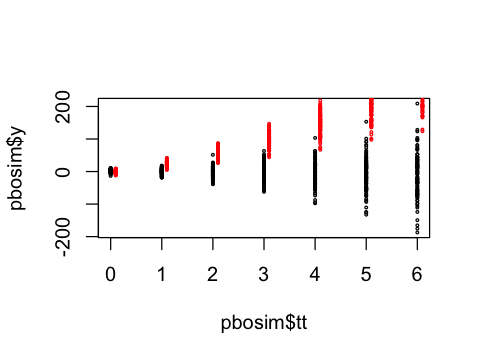

In [49]:
options(repr.plot.width=4, repr.plot.height=3)
plot(pbosim$tt, pbosim$y, col = 1, cex = 0.3)
points(drgsim$tt+0.1, drgsim$y, col = 2, cex = 0.3)

In [44]:
mean(puritys)

[1] 0.7410141

In [50]:
w = 1
PDF_fzw = function(X) {
  
  mu_drg = c(25,2) + w
  mu_pbo = c(0,0) + w
  
  m = mu_drg + mu_pbo
  
  D_drg_est = diag(1,2)
  D_pbo_est = diag(1,2)
  
  D = D_drg_est + D_pbo_est
  
  Q_drg = (-1/2)*t(X-mu_drg)%*%solve(D_drg_est)%*%(X-mu_drg)
  Q_pbo = (-1/2)*t(X-mu_pbo)%*%solve(D_pbo_est)%*%(X-mu_pbo)
  
  Q = (-1/2)*t(X-m)%*%solve(D)%*%(X-m)
  
  # pdf of multivariable normal distribution 
  f_drg = (1/(2*pi))*(1/sqrt(det(D_drg_est)))*exp(Q_drg)
  f_pbo = (1/(2*pi))*(1/sqrt(det(D_pbo_est)))*exp(Q_pbo)
  f = (1/(2*pi))*(1/sqrt(det(D)))*exp(Q)
  # purity function
  if((f_drg + f_pbo)!=0){
    res = (f_pbo - f_drg)^2 / (f_drg + f_pbo) 
  }else{
    res = 0
  }
  return(res)
}

adaptIntegrate(PDF_fzw, 
               lowerLimit= c(-Inf,-Inf),  
               upperLimit=c(Inf,Inf))$integral

[1] 1.000001

In [51]:
w = 1
PDF_fzw = function(X) {
  
  mu_drg = c(5,2) + w
  mu_pbo = c(0,0) + w
  
  m = mu_drg + mu_pbo
  
  D_drg_est = diag(1,2)
  D_pbo_est = diag(1,2)
  
  D = D_drg_est + D_pbo_est
  
  Q_drg = (-1/2)*t(X-mu_drg)%*%solve(D_drg_est)%*%(X-mu_drg)
  Q_pbo = (-1/2)*t(X-mu_pbo)%*%solve(D_pbo_est)%*%(X-mu_pbo)
  
  Q = (-1/2)*t(X-m)%*%solve(D)%*%(X-m)
  
  # pdf of multivariable normal distribution 
  f_drg = (1/(2*pi))*(1/sqrt(det(D_drg_est)))*exp(Q_drg)
  f_pbo = (1/(2*pi))*(1/sqrt(det(D_pbo_est)))*exp(Q_pbo)
  f = (1/(2*pi))*(1/sqrt(det(D)))*exp(Q)
  # purity function
  if((f_drg + f_pbo)!=0){
    res = (f_pbo - f_drg)^2 / (f_drg + f_pbo) 
  }else{
    res = 0
  }
  return(res)
}

adaptIntegrate(PDF_fzw, 
               lowerLimit= c(-Inf,-Inf),  
               upperLimit=c(Inf,Inf))$integral

[1] 1.978289